In [1]:
import urllib.request
import os

data_url="http://biostat.mc.vanderbilt.edu/wiki/put/Main/DataSets/titanic3.xls"
data_file_path="/Users/lumin/Documents/dataset/Titanic_data/titanic3.xls"

if not os.path.isfile(data_file_path):
    result=urllib.request.urlretrieve(data_url, data_file_path)
    print('downloaded:', result)
else:
    print(data_file_path, 'data file alreday exists.')

/Users/lumin/Documents/dataset/Titanic_data/titanic3.xls data file alreday exists.


In [2]:
import numpy
import pandas as pd
#读取数据文件，结果为DataFrame格式
df_data = pd.read_excel(data_file_path)

In [3]:
selected_cols = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
selected_df_data = df_data[selected_cols]

In [4]:
from sklearn import preprocessing
def prepare_data(df_data):
    df = df_data.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    df['embarked'] = df['embarked'].fillna('S')
    df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
    
    ndarray_data = df.values
    
    features = ndarray_data[:,1:]
    label = ndarray_data[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    norm_features = minmax_scale.fit_transform(features)
    
    return norm_features, label

In [5]:
shuffled_df_data = selected_df_data.sample(frac=1)

In [6]:
x_data,y_data=prepare_data(shuffled_df_data)

In [7]:
train_size = int(len(x_data)*0.8)

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_test = x_data[train_size:]
y_test = y_data[train_size:]

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=64,
                                input_dim=7,
                                use_bias=True,
                                kernel_initializer='uniform',
                                bias_initializer='zeros',
                                activation='relu'))
                                
model.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
logdir = '/Users/lumin/Documents/dataset/Titanic_data/logs'
checkpoint_path = '/Users/lumin/Documents/dataset/Titanic_data/checkpoint/Titanic.{epoch:02d}-{val_loss:.2f}.ckpt'

In [12]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=2),
             tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                period=5)]

In [13]:
train_history=model.fit(x=x_train,
                        y=y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=40,
                        callbacks=callbacks,
                        verbose=2)

Train on 837 samples, validate on 210 samples
Epoch 1/100
837/837 - 0s - loss: 0.7045 - acc: 0.6308 - val_loss: 0.6744 - val_acc: 0.5857
Epoch 2/100
837/837 - 0s - loss: 0.6245 - acc: 0.6308 - val_loss: 0.6166 - val_acc: 0.6000
Epoch 3/100
837/837 - 0s - loss: 0.5573 - acc: 0.7336 - val_loss: 0.5502 - val_acc: 0.7476
Epoch 4/100
837/837 - 0s - loss: 0.5025 - acc: 0.7873 - val_loss: 0.5232 - val_acc: 0.7524
Epoch 5/100

Epoch 00005: saving model to /Users/lumin/Documents/dataset/Titanic_data/checkpoint/Titanic.05-0.50.ckpt
837/837 - 0s - loss: 0.4771 - acc: 0.7897 - val_loss: 0.5032 - val_acc: 0.7619
Epoch 6/100
837/837 - 0s - loss: 0.4643 - acc: 0.8005 - val_loss: 0.4873 - val_acc: 0.7619
Epoch 7/100
837/837 - 0s - loss: 0.4591 - acc: 0.8005 - val_loss: 0.4812 - val_acc: 0.7619
Epoch 8/100
837/837 - 0s - loss: 0.4518 - acc: 0.8041 - val_loss: 0.4755 - val_acc: 0.7762
Epoch 9/100
837/837 - 0s - loss: 0.4464 - acc: 0.8076 - val_loss: 0.4724 - val_acc: 0.7762
Epoch 10/100

Epoch 00010: sa

Epoch 74/100
837/837 - 0s - loss: 0.4114 - acc: 0.8256 - val_loss: 0.4674 - val_acc: 0.7905
Epoch 75/100

Epoch 00075: saving model to /Users/lumin/Documents/dataset/Titanic_data/checkpoint/Titanic.75-0.46.ckpt
837/837 - 0s - loss: 0.4077 - acc: 0.8280 - val_loss: 0.4650 - val_acc: 0.7857
Epoch 76/100
837/837 - 0s - loss: 0.4093 - acc: 0.8268 - val_loss: 0.4634 - val_acc: 0.7857
Epoch 77/100
837/837 - 0s - loss: 0.4114 - acc: 0.8244 - val_loss: 0.4645 - val_acc: 0.7857
Epoch 78/100
837/837 - 0s - loss: 0.4083 - acc: 0.8268 - val_loss: 0.4651 - val_acc: 0.7857
Epoch 79/100
837/837 - 0s - loss: 0.4120 - acc: 0.8184 - val_loss: 0.4654 - val_acc: 0.7857
Epoch 80/100

Epoch 00080: saving model to /Users/lumin/Documents/dataset/Titanic_data/checkpoint/Titanic.80-0.47.ckpt
837/837 - 0s - loss: 0.4094 - acc: 0.8363 - val_loss: 0.4672 - val_acc: 0.8000
Epoch 81/100
837/837 - 0s - loss: 0.4088 - acc: 0.8327 - val_loss: 0.4691 - val_acc: 0.7857
Epoch 82/100
837/837 - 0s - loss: 0.4171 - acc: 0.82

In [14]:
train_history.history

{'loss': [0.7044996033147815,
  0.6245322840615413,
  0.5573362757228182,
  0.5025129373070729,
  0.47711696092088307,
  0.4643013797780519,
  0.45905010225952314,
  0.4517819992530303,
  0.4464499345817019,
  0.4434960942399402,
  0.4407926165502131,
  0.43997570662230717,
  0.435743904669225,
  0.43417934911367856,
  0.43026111348840357,
  0.43172036255559615,
  0.43427599017622937,
  0.4300969178958606,
  0.4276557264931883,
  0.42394784694646565,
  0.4263114606607772,
  0.42952017203026777,
  0.4279939572870945,
  0.42620780273577646,
  0.42292455244662513,
  0.4211471941023887,
  0.42007027354576537,
  0.42266137625581474,
  0.4307061813353353,
  0.4247109948734229,
  0.4206592167862285,
  0.42206617702007865,
  0.4206663627208632,
  0.4210544291220543,
  0.42141830725339435,
  0.41743644780013156,
  0.41970291473817084,
  0.4170974415761453,
  0.41776607597743026,
  0.4209188714961709,
  0.4187604168267518,
  0.42289995897912924,
  0.4205454553754526,
  0.4207952895614551,
  0.42

In [15]:
train_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [16]:
import matplotlib.pyplot as plt

def visu_train_history(train_history, train_metric, validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper letf')
    plt.show()

/Users/lumin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upper letf'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


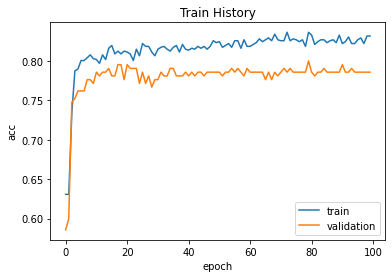

In [17]:
visu_train_history(train_history,'acc','val_acc')

/Users/lumin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upper letf'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


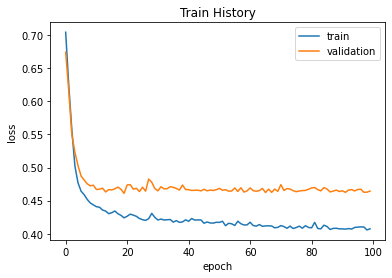

In [18]:
visu_train_history(train_history,'loss','val_loss')

In [19]:
evaluate_result = model.evaluate(x=x_test, y=y_test)

262/262 [==============================] - 0s 15us/sample - loss: 0.4759 - acc: 0.7863


In [20]:
evaluate_result

[0.4759460615975256, 0.78625953]

In [21]:
model.metrics_names

['loss', 'acc']